## **About This Notebook**

This notebook is designed for **learners** who want to understand the core concepts of machine learning - without feeling overwhelmed by overly complex techniques or advanced neural networks.  

Our goal here isn’t to build the most sophisticated models or chase state-of-the-art performance. Instead, we’re keeping things **clear, approachable, and practical** so you can focus on understanding *how* things work.

We’ll walk through the **full data science process** using **Microsoft Fabric Notebooks** - from exploring a dataset, preparing it, training models, and evaluating results.  

> The methods we’ll use are **robust enough for beginners** but powerful enough to demonstrate the magic of data science in action.

Think of this notebook as your friendly guide, showing you that machine learning doesn’t have to be scary. You don’t need 50 layers of deep learning to make sense of data and start solving problems.  

By the end, you’ll have the confidence to run these workflows yourself, experiment with your own datasets, and start building from there.

Let’s keep it fun, light, and hands-on.

**Created by:** [Sahir Maharaj](https://www.linkedin.com/in/sahir-maharaj/)


## **Before we start with the fun part...**

We need to make sure all the right tools are installed.

First, we’ll install all the Python libraries we’ll use throughout the notebook — including tools for working with data, training models, visualizing results, and handling time series.

> If you're using **Google Colab**, you're good to go - just run the cell below.  
> If you're on **Jupyter locally**, this works the same way - copy, paste, and run!

Yeah I know, I know... This isn’t the full universe of ML packages (there are tons out there), but it’s more than enough to get us started and cover the most common use cases.

Once we install these, we’ll be ready to start loading datasets, exploring them, and building cool things.

In [1]:
# Install core numerical and data manipulation libraries
!pip install numpy              # Core library for numerical computing
!pip install pandas             # For working with tabular data and DataFrames

# Install visualization libraries
!pip install matplotlib         # Static visualizations like line plots and histograms
!pip install seaborn            # Statistical plots built on top of matplotlib
!pip install plotly             # Interactive and animated plots

# Install scikit-learn for ML models and preprocessing
!pip install scikit-learn       # Core ML library for classification, regression, clustering, etc.

# Install advanced boosting frameworks
!pip install xgboost            # High-performance gradient boosting (optimized for speed and accuracy)
!pip install lightgbm           # Fast, lightweight gradient boosting for large datasets
!pip install optuna -q
!pip -q install catboost

# Install time series analysis libraries
!pip install statsmodels        # For statistical models (ARIMA, linear regression, etc.)
!pip install prophet            # Facebook’s library for time series forecasting with seasonality

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


Awesome - now that the packages are installed, let’s actually bring them into our notebook so we can start using them.

Think of this step like unpacking your toolbox and laying everything out neatly. We'll import everything we need to:

- Work with data (like tables and numbers)
- Visualize it (because seeing is understanding)
- Train and evaluate machine learning models (the real magic)
- Handle time series forecasting and anomaly detection (for more advanced stuff)

Each import is grouped by what it does - and you’ll see a short note next to each one so you know what it’s for. No guessing, no fluff.

In [79]:
# Core packages
import numpy as np                           # Numerical operations and working with arrays
import pandas as pd                          # Data manipulation and working with DataFrames

# Visualization packages
import matplotlib.pyplot as plt              # Static visualizations like line plots and histograms
import seaborn as sns                        # Statistical plots built on top of Matplotlib
import plotly.express as px                  # Quick interactive visualizations with minimal code
import plotly.graph_objects as go            # Highly customizable interactive visualizations

# Data preprocessing and selection
from sklearn.model_selection import (
    train_test_split,                        # Splitting data into training and testing sets
    StratifiedKFold,                         # Cross-validation keeping class balance intact
    cross_val_score,                         # Evaluate a model with cross-validation
    cross_validate,                          # Cross-validation returning multiple metrics
    GridSearchCV,                             # Exhaustive hyperparameter tuning
    RandomizedSearchCV                        # Randomized hyperparameter tuning
)
from sklearn.preprocessing import (
    StandardScaler,                          # Standardize features (zero mean, unit variance)
    LabelEncoder                              # Convert categorical labels into numerical form
)

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,                          # Percentage of correct predictions
    precision_score,                          # Positive predictions that are correct
    recall_score,                            # Correctly identified positives
    f1_score,                                 # Harmonic mean of precision & recall
    confusion_matrix,                         # Matrix comparing predicted vs actual
    roc_auc_score,                            # Area under the ROC curve
    mean_absolute_error,                      # Average absolute difference (regression)
    mean_squared_error,                       # Average squared difference (regression)
    r2_score                                  # Goodness of fit for regression
)

# Classification models
from sklearn.linear_model import (
    LogisticRegression,                      # Logistic regression for classification
    RidgeClassifier,                         # Ridge regression adapted for classification
    SGDClassifier,                            # Linear models with stochastic gradient descent
    Perceptron                                # Simple linear binary classifier
)
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for classification
from sklearn.ensemble import (
    RandomForestClassifier,                  # Ensemble of decision trees
    GradientBoostingClassifier,              # Gradient Boosted Trees
    AdaBoostClassifier,                      # Adaptive Boosting
    ExtraTreesClassifier,                     # Extremely randomized trees
    HistGradientBoostingClassifier,           # Fast histogram-based gradient boosting
    StackingClassifier                        # Stacking ensemble method

)
from sklearn.naive_bayes import (
    GaussianNB,                               # Naive Bayes with Gaussian likelihood
    BernoulliNB                               # Naive Bayes for binary features
)
from sklearn.neighbors import KNeighborsClassifier  # Distance-based classification
from sklearn.svm import (
    SVC,                                     # Kernel Support Vector Machine
    LinearSVC                                # Linear Support Vector Machine
)

# Boosting libraries
from xgboost import XGBClassifier            # XGBoost - high performance gradient boosting
from lightgbm import LGBMClassifier          # LightGBM - fast gradient boosting
from catboost import CatBoostClassifier      # CatBoost - gradient boosting for categorical data

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression and regularized regressions
from sklearn.tree import DecisionTreeRegressor                   # Decision Tree for regression
from sklearn.ensemble import RandomForestRegressor               # Random Forest for regression

# Feature selection and pipelines
from sklearn.feature_selection import SelectFromModel             # Feature selection using model importance
from sklearn.pipeline import Pipeline                             # Combine preprocessing and modeling in one go
import optuna                                                     # Import optuna

# Unsupervised learning
from sklearn.cluster import (
    KMeans,                                                       # Partition-based clustering
    DBSCAN,                                                       # Density-based clustering
    AgglomerativeClustering                                       # Hierarchical clustering
)
from sklearn.decomposition import PCA                             # Dimensionality reduction
from sklearn.svm import OneClassSVM                               # Anomaly detection using SVM
from sklearn.ensemble import IsolationForest                      # Anomaly detection using trees

# Time series
import statsmodels.api as sm                                      # Statistical modeling (ARIMA, trends, etc.)
from prophet import Prophet                                       # Facebook's time series forecasting

# Misc
import warnings                                                   # Handle warnings in notebook
warnings.filterwarnings('ignore')                                 # Suppress warnings for cleaner output
pd.set_option('display.max_columns', 100)                         # Show more columns in DataFrame outputs
sns.set(style='whitegrid')                                        # Seaborn default style

## **1. Problem Understanding**

Before we start writing any code, we need to pause and ask an important question:

> What exactly are we trying to solve here?

For this example, we are using the Titanic dataset — one of the most popular  datasets in the data science world.

The Titanic dataset is based on the real passengers aboard the RMS Titanic, the British ship that tragically sank in 1912. Each row in the dataset is a person who was on that ship. We’re given some information about them — like their age, which class they traveled in (1st, 2nd, or 3rd), where they boarded the ship, and a few other things.

But the most important column — the one we’re trying to predict — is:

> `Survived` → Did the person survive the disaster?  
> - `1` means yes  
> - `0` means no

---

### Wait... So What’s the Real Goal?

We want to **build a model that can predict survival** based on the available passenger information.

Think of it this way:

> Given what we know about this person — their age, class, gender, etc. — can we guess whether they survived?

This type of task is called a **classification problem**, because we’re trying to place people into **categories** or **classes**.

In this case, there are only two possible classes:
- **Survived** (1)
- **Did not survive** (0)

This is known as **binary classification** — “binary” meaning just two possible outcomes.

---

### What is Classification (In Simple Terms)?

Let's say you’re sorting apples and oranges. You pick one up, look at its color and shape, and decide whether it’s an apple or an orange.  
That’s classification.

In machine learning, we try to **teach a computer how to classify things**, using data.

Here are a few real-world examples of classification:
- Is this email spam or not spam?  
- Will a customer churn (leave) or stay?  
- Is this transaction fraudulent or legitimate?  
- Does this X-ray show signs of pneumonia?

And in our case:
- Did this Titanic passenger survive or not?

---

### Classification vs. Regression

Just to be clear - classification is different from another common ML task: **regression**.

- **Classification** = predicting **categories** (e.g., Yes/No, Male/Female, Disease/No Disease)
- **Regression** = predicting **numbers** (e.g., house prices, temperature, stock prices)

Here’s a quick comparison:

| Task Type       | Example Problem                          | Output Type        |
|------------------|------------------------------------------|---------------------|
| Classification   | Will this customer churn?                | Yes or No (category) |
| Regression       | What will this house sell for?           | $320,000 (number)    |

In this notebook, we’ll cover **classification**, using the Titanic dataset.

---

### What Will You Learn?

By working through this Titanic classification problem, you’ll get hands-on experience with:
- Understanding and preparing raw data
- Handling missing values and encoding categories
- Building models using scikit-learn (like logistic regression, decision trees, etc.)
- Evaluating performance using accuracy, confusion matrix, precision, recall, and more
- Improving model performance and avoiding common pitfalls

---

In [3]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **2. Exploratory Data Analysis (EDA)**

Yay! We’ve got our dataset, and we know the goal: predict who survived the Titanic.

But before we even *think* about building a machine learning model, we need to do what every great detective does first: **look around**.  
No jumping to conclusions. No assumptions. Just good ol' fashioned data snooping.

This step is called **Exploratory Data Analysis** (or EDA) and it’s basically our chance to:
- Peek inside the data
- Spot anything weird or messy
- Start asking questions

Think of it like moving into a new apartment.  
Before decorating or rearranging furniture, you walk through every room, open every drawer, and figure out where things are (and what needs fixing).

EDA is exactly that - but for data.

---

### Here’s the plan:

- Check how big the dataset is (rows + columns)
- View the first few entries
- Get a sense of data types (numbers? text? categories?)
- Look for missing values (spoiler: there are some!)
- See how balanced the target column is (survived vs not)
- Start *wondering* — like, “Do more women survive than men?”

This is the fun part — it’s where patterns start to show up.
It’s where we get to *know* the data before we try to teach a model.

In [4]:
# How many rows and columns are we working with?
print(f"Shape of the dataset: {df.shape}")  # (rows, columns)

# Peek at the first 5 passengers
df.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# See data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Quick summary of the numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Let’s look at the target variable: how many survived vs didn’t?
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


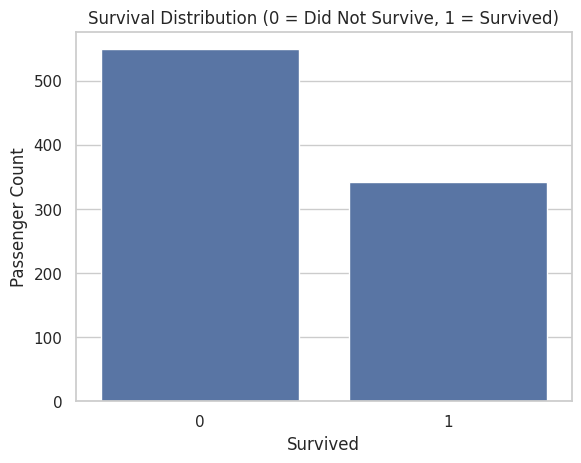

In [8]:
# Visualizing the target distribution
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution (0 = Did Not Survive, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.show()

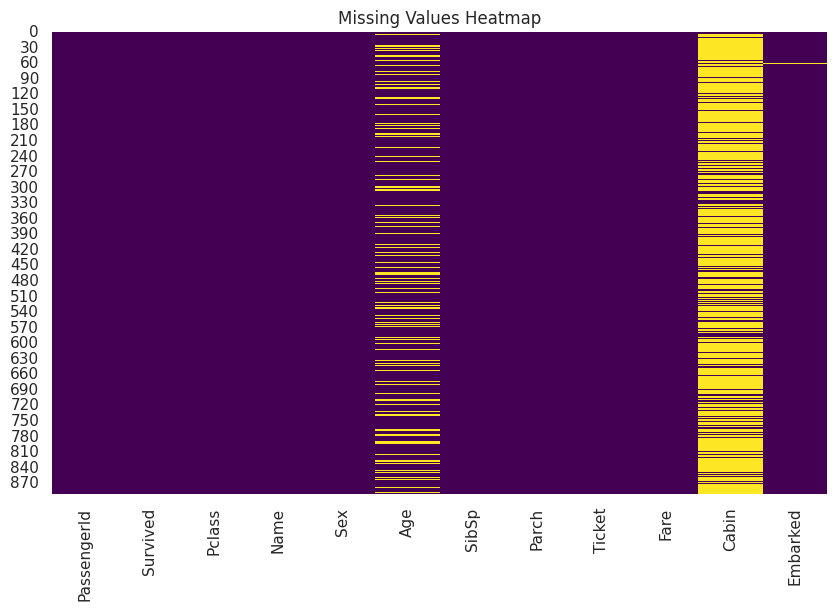

In [9]:
# Missing values check (visual)
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

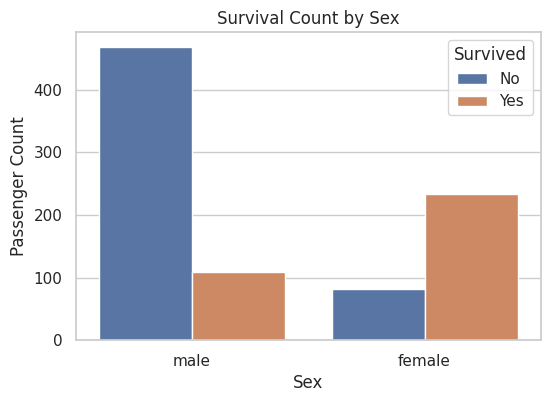

In [10]:
# Survival rate by Sex
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

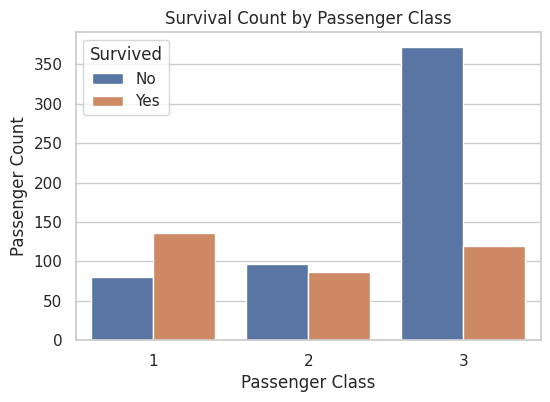

In [11]:
# Survival rate by Passenger Class (Pclass)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

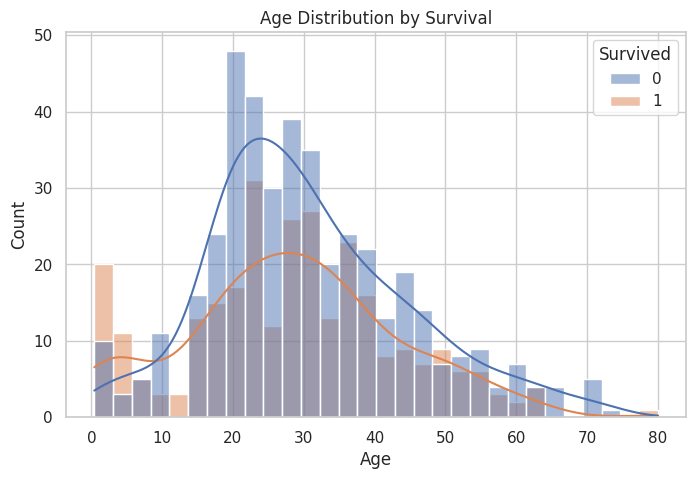

In [12]:
# Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

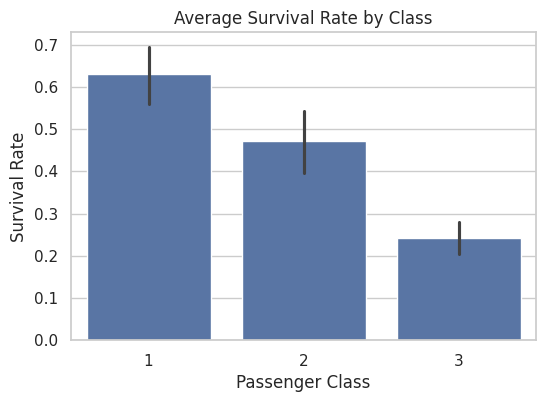

In [13]:
# Average survival rate by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Average Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

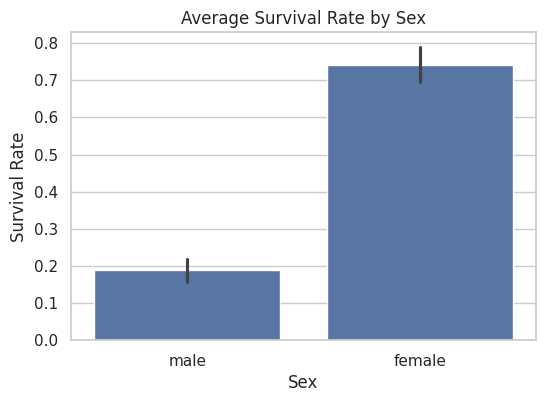

In [14]:
# Average survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Average Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

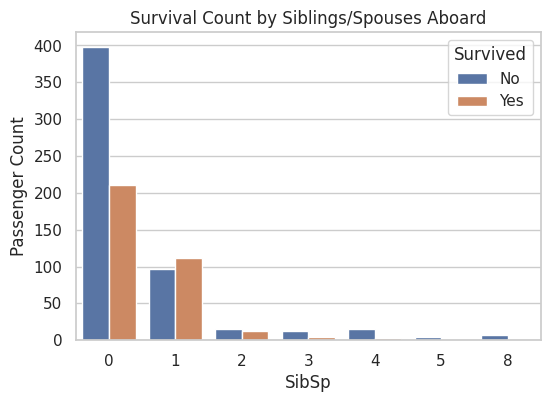

In [15]:
# SibSp (Number of Siblings/Spouses Aboard) vs Survival
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival Count by Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

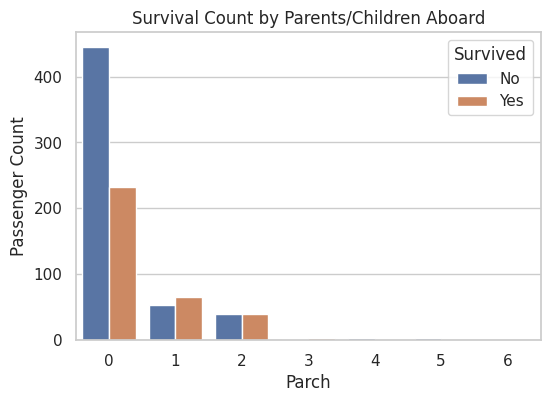

In [16]:
# Parch (Number of Parents/Children Aboard) vs Survival
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title('Survival Count by Parents/Children Aboard')
plt.xlabel('Parch')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

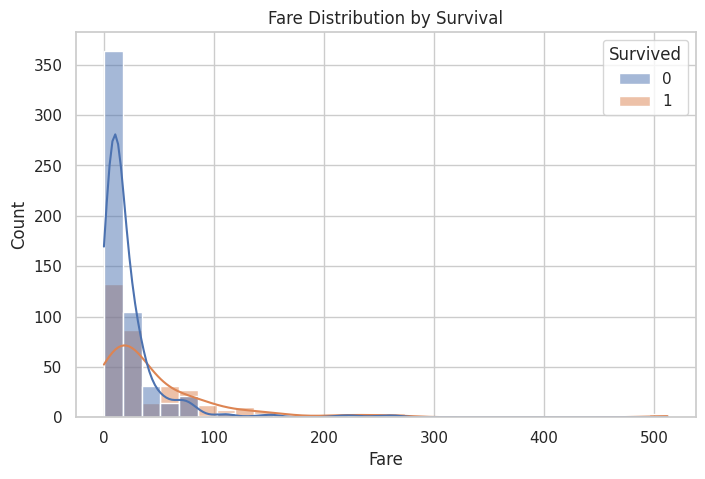

In [17]:
# Fare distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

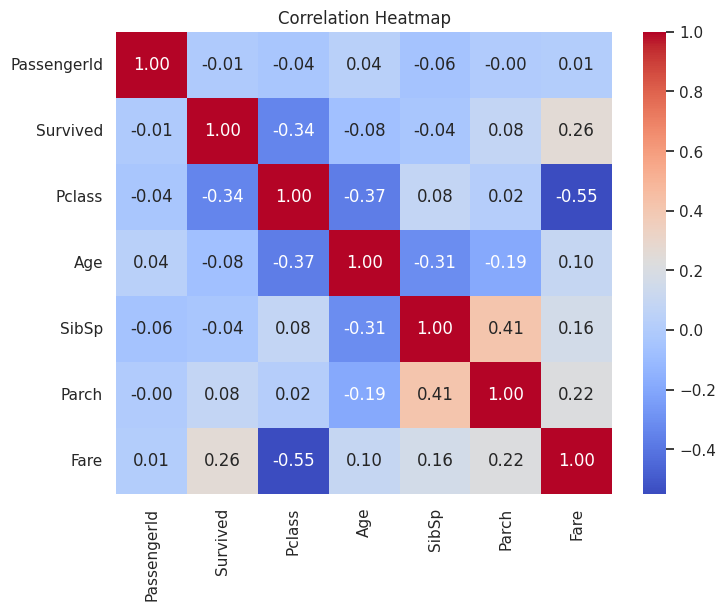

In [18]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## What We Learned From EDA

Great job getting through the first look at the data! Here’s a summary of what we just saw.

---

### Target distribution (Survived)
- The classes aren’t perfectly balanced: **more people did not survive than survived** (roughly ~60/40 split).  
- This is **not extreme imbalance**, but it’s enough that we should track metrics beyond raw accuracy (e.g., **precision/recall/F1**), so we don’t get fooled by a model that just predicts the majority class.

---

### Missingness & data quality
- **`Cabin`** is missing for most passengers. Treat it as **highly sparse**. We’ll likely:
  - Drop it entirely **or**
  - Extract a coarse feature (e.g., **Deck** from the first letter) and mark missing as its own category.
- **`Age`** has noticeable missing values. We’ll need to **impute** it:
  - Simple baseline: median imputation.
  - Slightly smarter: median imputation **grouped** by `Sex` and `Pclass` (often improves signal).
- **`Embarked`** has a **few** missing values. Easy fix: impute with the **mode**.
- No obvious column looks like a duplicate identifier **except** `PassengerId` (which we’ll drop from features).

---

### Categorical features vs survival
- **`Sex`** is a strong signal: **females survived at much higher rates** than males. This aligns with the “women and children first” policy.
- **`Pclass`** (1st, 2nd, 3rd class) shows a clear pattern: **higher class → higher survival** on average. Likely due to proximity to lifeboats and cabins.
- **`Embarked`** (port of embarkation: S, C, Q) may show **subtle survival differences**. Even if the effect is small, it’s easy to include after proper encoding.

---

### Numeric features vs survival
- **`Age`**:
  - Distribution suggests **children** had relatively better outcomes, but overall age alone isn’t a silver bullet.
  - Missingness must be handled carefully to avoid bias.
- **`Fare`**:
  - Skewed to the right (a few very high fares). A **log transform** often helps tree-agnostic models and linear models alike.
  - Generally, **higher fare correlates with higher survival** (ties back to `Pclass` and cabin location).
- **`SibSp`** and **`Parch`** (family aboard):
  - Many passengers have **0** in these fields (traveling alone).
  - Survival seems **non-linear**: being totally alone can hurt, **very large families** also reduce survival; **small family sizes** sometimes help.
  - This screams **feature engineering** opportunity (see below).

---

### Correlations (numeric)
- The correlation heatmap shows:
  - `Survived` is **negatively** correlated with `Pclass` (remember: **1 < 2 < 3**; lower class number means higher class).
  - `Survived` is **positively** correlated with `Fare`.
  - `Age` tends to have **weak linear correlation** with `Survived` (non-linear patterns + missingness dilute the signal).
- Reminder: correlations capture **linear** relationships only; trees can still pick up useful **non-linear** splits.

---

### Early feature engineering ideas
- **`FamilySize`** = `SibSp + Parch + 1` (the `+1` counts the passenger).  
  Useful to capture the “alone vs small group vs large group” effect.
- **`IsAlone`** = `1` if `FamilySize == 1` else `0`.  
  Often pops as a helpful binary feature.
- **Title extraction from `Name`** (e.g., Mr, Mrs, Miss, Master, Rare titles):  
  Can capture **age/social status** proxies and sometimes boosts performance.
- **`Deck`** from `Cabin` initial (A–G, T, or `Missing` as its own category):  
  Even with lots of missingness, a coarse deck grouping can add signal.
- **Log-transform `Fare`** to reduce skew: `Fare_log = log1p(Fare)`.

---

## **3. Data Cleaning & Preprocessing**

This is the “makeover” stage for our dataset.

Up until now, we’ve been detectives — looking around, spotting patterns, and making notes about what’s missing or messy.  
Now, it’s time to roll up our sleeves and **fix** those issues so our data is ready for modeling.

I like to think of it like **cooking**:  

* EDA was the grocery shopping and recipe planning.
* Preprocessing is the chopping, peeling, and marinating — getting everything prepped before it hits the stove.

---

### Why this step matters

Machine learning models don’t like:
- Missing values (they just error out or misbehave)
- Categorical text (they need numbers)
- Unscaled features when using certain algorithms
- Messy, irrelevant columns that add noise

Our task here is to:
1. Fill in or handle missing data  
2. Create new features that might help the model (feature engineering)  
3. Encode categorical variables into numeric form  
4. Optionally scale/transform values (if the chosen models need it)  
5. Drop columns that don’t add value

---

### Preprocessing plan (based on what we learnt from EDA)
1. **Drop useless or risky columns**:
   - `PassengerId`: ID column — no predictive value.
   - `Ticket`: messy, hard to standardize, and likely no stable predictive power without deep parsing.
   - `Cabin`: mostly missing — we’ll either drop it or extract a simple `Deck` feature.

2. **Handle missing values**:
   - `Age`: fill with median age **per** (`Sex`, `Pclass`) group.
   - `Embarked`: fill with most frequent port.
   - Drop rows with missing `Fare` (rare) or impute median.

3. **Feature engineering**:
   - `FamilySize` = `SibSp + Parch + 1`
   - `IsAlone` = 1 if `FamilySize == 1`, else 0
   - `Title` from `Name` (Mr, Mrs, Miss, Master, etc.), grouped into common/rare
   - Optionally: `Deck` from `Cabin` (A–G, T, Missing as separate category)
   - Log-transform `Fare` to reduce skew (`log1p`)

4. **Encode categoricals**:
   - `Sex`, `Embarked`, `Title`, `Deck` → numeric codes or one-hot encoding

5. **Scaling (optional)**:
   - Only needed if using linear models, KNN, or SVM.
   - Tree-based models don’t need scaling.

---

### So, the big question... Why not do this *after* splitting into train/test?

We *will* split before fitting — but in this notebook, we’re showing preprocessing on the full dataset for learning purposes first.  
In a real ML workflow, all preprocessing steps would be wrapped in a **pipeline** and applied only to the training set, then to the test set, to avoid **data leakage**.

---

In [19]:
# 1️⃣ Drop irrelevant columns
df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)


In [20]:
# 2️⃣ Fill missing Embarked with mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
# 3) Handle missing Age using group-wise median
age_group_median = df.groupby(['Sex', 'Pclass'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(age_group_median)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [22]:
# 4) Fill missing Fare (if any) with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [23]:
# 5) Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [24]:
# 6) Family features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [25]:
# 7) Deck from Cabin (coarse), mark missing as 'M'
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

In [26]:
# 8) Drop original Name and Cabin
df.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [27]:
# 9) Log-transform Fare (reduce skew)
df['Fare'] = np.log1p(df['Fare'])

In [28]:
# 10) Encode categoricals
for col in ['Sex', 'Embarked', 'Title', 'Deck']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [29]:
# Final check
print("Remaining missing values:\n", df.isnull().sum())
df.head()

Remaining missing values:
 Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
Deck          0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck
0,0,3,1,22.0,1,0,2.110213,2,2,2,0,7
1,1,1,0,38.0,1,0,4.280593,0,3,2,0,2
2,1,3,0,26.0,0,0,2.188856,2,1,1,1,7
3,1,1,0,35.0,1,0,3.990834,2,3,2,0,2
4,0,3,1,35.0,0,0,2.202765,2,2,1,1,7


Now that our Titanic dataset has had a full “spa treatment,” here’s what’s happened — and why it matters before we train any model.

---

### Missing values are no longer a problem
- `Embarked` is now complete — no more mysterious blanks about where passengers boarded.
- `Age` is fully filled in using **group medians** based on `Sex` and `Pclass`.  
  This is smarter than using a single number for everyone because:
  - A 1st-class female passenger is more likely to have a different age profile than a 3rd-class male passenger.
- `Fare` is also complete — no gaps for our model to trip over.

---

### New features add extra context
- `FamilySize` tells us if the passenger was traveling solo or with company.
- `IsAlone` turns that into a simple yes/no signal.
- `Title` (Mr, Mrs, Miss, Master, Rare) gives a sense of social status, gender, and even age group.
- `Deck` gives us a rough location on the ship (or “M” if we don’t know), which can matter for survival.

These features **weren’t directly in the raw dataset** — we engineered them from the information we already had.  

I find that this is one of the best parts of data science: getting more value from the data you’re given.

---

### Cleaner, simpler data
- We dropped columns that add noise (`PassengerId`, `Ticket`, raw `Name`, and raw `Cabin`).
- All categorical columns (`Sex`, `Embarked`, `Title`, `Deck`) are now numeric — ready for ML algorithms.
- `Fare` has been log-transformed to reduce the impact of extreme high-ticket outliers.

---

### Why does this matter? What happens if we skipped this step?
Models **don’t** think like humans — they won’t “figure out” that `Sex` means gender or that missing `Cabin` data might mean cheaper tickets.  

We have to give them **clear, consistent, numeric information** so they can focus on learning patterns instead of getting confused by messy input.

At this point, our dataset is **clean, consistent, and enriched**.  



## **4. Train/Test Split**

Well done! Our dataset is clean, tidy, and looking sharp.  
Now we face a very important rule in machine learning:

> **Never test your model on the same data you trained it on.**

Why? Because that’s like letting a student take an exam using the answer sheet they studied from.

Sure, they’ll get a perfect score — but does that really mean they *understand* the material? Probably not.  

In the real world, when you deploy a model, it will face **brand-new data** it’s never seen before. If it can’t handle that, it’s just memorizing, not learning. That’s called **overfitting**, and it’s one of the most common traps in machine learning.

---

### How the split works
We’re going to break our dataset into two parts:

- **Training set** → This is like the lecture, homework, and practice exams. The model learns patterns from here.
- **Test set** → This is the final exam. The model never gets to see this until the very end, so it’s a fair measure of how well it learned.

Think of it like training a new chef:
- You give them **recipes** (train set) to practice on.
- Later, you surprise them with a **mystery basket** of ingredients (test set) and see if they can still cook something amazing.

---

### Why we *stratify*
Our target variable (`Survived`) has two classes: 0 = didn’t survive, 1 = survived.  
If we split randomly, we *might* end up with one set that has way more survivors than the other — which would mess up training and evaluation.  

By **stratifying**, we make sure the ratio of survivors to non-survivors stays roughly the same in both the train and test sets.  

I like to think of it like making sure two sports teams are evenly matched before a friendly game.

---

### So, here's the plan:
1. Separate `Survived` (target) from the other features.
2. Split into train (80%) and test (20%) while keeping class balance (stratify).
3. Check the shapes and the class ratios for sanity.
4. Calculate a baseline accuracy from the training set’s majority class.

---

In [30]:
# 1) Target and features
TARGET = 'Survived'
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [31]:
# 2) Train/test split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

In [32]:
# 3) Quick sanity checks
print("Shapes:")
print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_test : {X_test.shape},  y_test : {y_test.shape}")

Shapes:
  X_train: (712, 11), y_train: (712,)
  X_test : (179, 11),  y_test : (179,)


In [33]:
# 4) Class balance in each split
def pct_counts(s):
    return (s.value_counts(normalize=True) * 100).round(2).astype(str) + '%'

print("\nClass balance:")
print("  Train:\n", pct_counts(y_train))
print("  Test:\n", pct_counts(y_test))


Class balance:
  Train:
 Survived
0    61.66%
1    38.34%
Name: proportion, dtype: object
  Test:
 Survived
0    61.45%
1    38.55%
Name: proportion, dtype: object


In [34]:
# 5) Baseline: always predict the majority class from the TRAIN set
majority_class = y_train.mode()[0]
baseline_acc = (y_test == majority_class).mean()

print(f"\nBaseline (always predict {majority_class}): {baseline_acc:.3f} accuracy")

# Peek at the feature columns we’ll feed into models
print("\nFeatures being used:")
print(list(X_train.columns))


Baseline (always predict 0): 0.615 accuracy

Features being used:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'Deck']


## **5. Building Our First Model**

Nice! So, we’ve cleaned the data, split it into train and test sets, and locked the test set away so we can’t cheat.  

Now it’s time to hand our dataset over to a machine learning algorithm and see if it can learn patterns that help predict survival.

---

### Choosing a first model
When we start a project, it’s usually best to begin with something:
- **Simple** → so we can quickly test our pipeline and see if our features have signal.
- **Fast** → so we don’t wait forever for results.
- **Interpretable** → so we can understand what’s going on under the hood.

For classification problems like Titanic, **Logistic Regression** is a common first choice:
- Despite the name, it’s not for regression — it’s for binary classification.
- It works by finding a mathematical function that best separates survivors from non-survivors.
- It’s quick to train, easy to interpret, and a great baseline.

---

### The experiment mindset
Our goal here is **not** to build the perfect model right away.  
Instead, we want to:
1. Confirm our pipeline works end-to-end.
2. Get a baseline score for a *real* model (better than the dumb “majority class” baseline from Step 4).
3. Spot any glaring issues early (e.g., bad features, leakage, wrong encodings).

I like to think of this like a chef doing a test bake of a cake recipe — it’s not meant to be perfect yet, but it tells us if we’re even on the right track.

---

### How we’ll measure success
Since we have a slightly imbalanced dataset, **accuracy alone** can be misleading.  
We’ll also check:
- **Precision** → of the passengers we predicted would survive, how many actually did?
- **Recall** → of all the passengers who survived, how many did we correctly identify?
- **F1 Score** → a balance between precision and recall.
- **Confusion Matrix** → to see exactly where the model is making mistakes.

These metrics are super important in real-world problems — for example, in medical diagnoses, you might care more about recall (catching all sick patients) than raw accuracy.

---

### Here's the plan:
1. Train a Logistic Regression model on the training data.
2. Predict on the test data.
3. Evaluate performance using accuracy, precision, recall, F1, and a confusion matrix.
4. Compare against the baseline from Step 4.
5. Decide what to try next (e.g., tree-based models, parameter tuning, more features).

Once we have this working, we can start experimenting with more powerful algorithms... but we’ll always keep this simple model as our **baseline reference**.


In [35]:
# 1) Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)


In [36]:
# 2) Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
# 3) Predict on the test set
y_pred = log_reg.predict(X_test)

In [38]:
# 4) Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")

Accuracy : 0.810
Precision: 0.778
Recall   : 0.710
F1 Score : 0.742


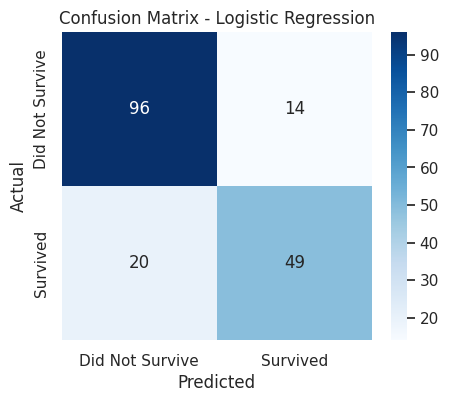

In [39]:
# 5) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

> Congrats!🎉 You’ve officially trained your first machine learning model!

Let’s unpack what those numbers and the confusion matrix actually mean.

---

### Accuracy
This tells us **what percentage of total predictions were correct**.  
If our accuracy is, say, 80%, that means the model got 8 out of 10 passengers right.

- 👍 High accuracy means we’re doing better than random guessing.
- ⚠️ But accuracy can hide the reality when classes are imbalanced — that’s why we also check other metrics.

---

### Precision
This answers: **“Of all the passengers we predicted would survive, how many actually did?”**  
If our precision is 0.75, that means 3 out of 4 survival predictions were correct.

For example:
- In an email spam filter, high precision means that almost every email marked as “spam” really is spam (few false alarms).

---

### Recall
This answers: **“Of all the passengers who *actually* survived, how many did we correctly predict?”**  
If recall is 0.65, that means we found 65% of the real survivors, but missed the other 35%.

For example:
- In medical screening, high recall means catching most sick patients, even if that means a few healthy people get flagged by mistake.

---

### F1 Score (No, not Formula 1)
This is a **balance between precision and recall**.  
It’s useful when you want to weigh both equally and avoid being fooled by one metric looking great while the other is terrible.

---

### Confusion Matrix
The confusion matrix breaks our predictions into 4 categories:

|                | Predicted No | Predicted Yes |
|----------------|--------------|---------------|
| **Actual No**  | True Negative (TN) | False Positive (FP) |
| **Actual Yes** | False Negative (FN) | True Positive (TP) |

In Titanic terms:
- **TN**: We correctly predicted they didn’t survive.
- **FP**: We said they survived, but they didn’t (overly optimistic).
- **FN**: We said they didn’t survive, but they did (missed survivors).
- **TP**: We correctly predicted they survived.

Our goal is to **maximize TP and TN** while minimizing FP and FN.

---

### So, lets recap what we’ve learned so far...
- The model is definitely learning patterns from the data — it should beat the baseline from Step 4.
- We might still be missing survivors (low recall) or falsely labeling non-survivors as survivors (low precision).
- This is a good starting point, but there’s room to improve with more powerful algorithms, better features, and tuning.


> Remember: we’re not chasing perfect accuracy... we’re building a model that **generalizes well** to unseen data.


---

## **6. Experimentation - Trying a Stronger Model**

Our first model (Logistic Regression) was a great starting point, but it’s like using a straight ruler to separate survivors from non-survivors — it draws a neat line, but real life is rarely that tidy.

Now we’ll try **Random Forest**, which is often more powerful for problems like this.

---

### What is Random Forest?
- Imagine asking **lots of different decision trees** to predict survival.
- Each tree makes its own guess.
- The forest takes a **vote**, and the majority wins.

This “many small brains are better than one big brain” approach is called **ensemble learning**.

---

### Why it’s better than one tree
- Can spot **complex patterns** like “young women in 1st class usually survive”.
- Can combine different features naturally without us doing the math.
- Doesn’t care if some features are bigger numbers than others — no scaling needed.
- Less likely to make silly predictions from noise in the data.

---

### The plan here is simple:
1. Train the Random Forest model on our training data.
2. Predict on the test set.
3. Check the same metrics we used before (accuracy, precision, recall, F1).
4. See which features were the most important for the model’s decisions.

---

### Lets bring this concept to the real-world...
Think of it like asking **100 lifeguards** whether someone in the water is in trouble:
- One lifeguard might focus on how they’re waving their arms.
- Another looks at how far they are from shore.
- Another checks how long they’ve been out there.

Each has their own method — but when they all vote, the decision is usually more reliable.

---

In [40]:
# 1) Initialize the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=200,       # number of trees in the forest
    max_depth=None,         # let trees expand until they are pure
    random_state=42
)

In [41]:
# 2) Train the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
# 3) Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

In [43]:
# 4) Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Accuracy : {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall   : {rec_rf:.3f}")
print(f"F1 Score : {f1_rf:.3f}")

Random Forest Performance:
Accuracy : 0.804
Precision: 0.758
Recall   : 0.725
F1 Score : 0.741


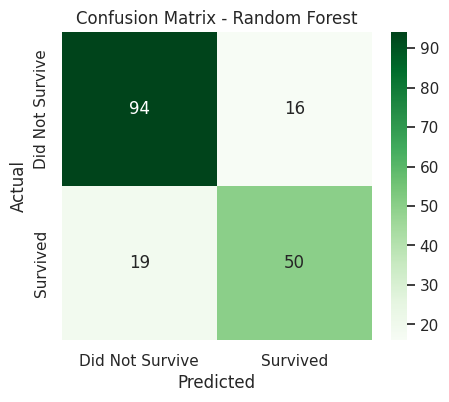

In [44]:
# 5) Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

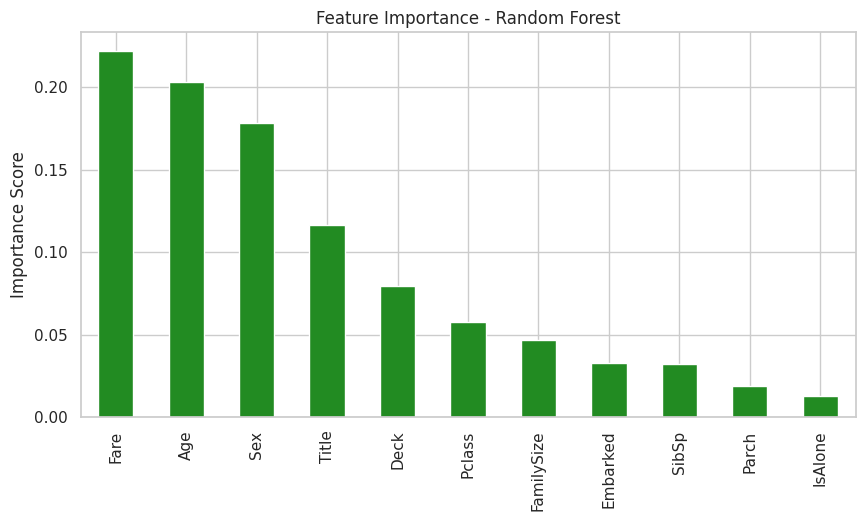

In [45]:
# 6) Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='forestgreen')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance Score')
plt.show()

## **7. Hyperparameter Tuning (for Better Performance)**

Our Random Forest did a good job right out of the box — but we didn’t tell it *how* to grow its trees.  

By default, it makes some “safe” choices, but these aren’t always the best for every dataset.

---

### What is tuning?
Tuning means changing the **hyperparameters** of a model — these are settings that control *how* the model learns.  

They’re not learned from the data; we choose them.

Think of it like adjusting:
- The heat and cooking time for a recipe
- The difficulty setting in a video game
- The suspension stiffness on a car

In Random Forest, some key hyperparameters are:
- **n_estimators** → number of trees in the forest (more trees = more stability, but slower training)
- **max_depth** → how deep each tree can grow (deeper = more detail, but risk of overfitting)
- **min_samples_split** → minimum samples needed to split a node (higher = simpler trees)
- **min_samples_leaf** → minimum samples per leaf node (higher = less chance of overfitting)
- **max_features** → number of features to consider at each split (smaller = more diversity in trees)

---

### Our tuning approach
We’ll use **GridSearchCV** from scikit-learn:
- It tries multiple combinations of hyperparameters.
- It uses **cross-validation** to test each combination on different slices of the training data.
- It tells us which settings performed best.

This helps us avoid guessing — we let the computer do the trial-and-error for us.

---

### Lets make this practical...
Imagine you’re trying to make the perfect cup of coffee:
- You try different grind sizes, brew times, and temperatures.
- You taste each version.
- You pick the one that’s just right.

That’s exactly what GridSearchCV does (but for our model).

---

### ⚠️ A note on speed
Tuning can be slow because it trains many models. We’ll keep our search space small for now, so it’s fast enough to run in a notebook.

---

In [46]:
# 1) Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],     # number of trees
    'max_depth': [None, 5, 10, 15],      # how deep each tree can grow
    'min_samples_split': [2, 5, 10],     # min samples needed to split a node
    'min_samples_leaf': [1, 2, 4],       # min samples per leaf
    'max_features': ['sqrt', 'log2']     # number of features to consider at each split
}

In [47]:
# 2) Initialize a base Random Forest model
rf_base = RandomForestClassifier(random_state=42)

In [48]:
# 3) Set up the GridSearchCV to test different parameter combinations
grid_search = GridSearchCV(
    estimator=rf_base,         # model to tune
    param_grid=param_grid,     # parameters to test
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # use all CPU cores
    scoring='f1',               # optimize for F1 Score
    verbose=1                  # show progress
)

In [49]:
# 4) Run the grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [50]:
# 5) Show the best parameters found and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation F1 Score: 0.7566318568593818


In [51]:
# 6) Train a final Random Forest with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [52]:
# 7) Predict on the test set using the tuned model
y_pred_best = best_rf.predict(X_test)

In [53]:
# 8) Evaluate the tuned model's performance
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\nTuned Random Forest Performance:")
print(f"Accuracy : {acc_best:.3f}")
print(f"Precision: {prec_best:.3f}")
print(f"Recall   : {rec_best:.3f}")
print(f"F1 Score : {f1_best:.3f}")


Tuned Random Forest Performance:
Accuracy : 0.816
Precision: 0.773
Recall   : 0.739
F1 Score : 0.756


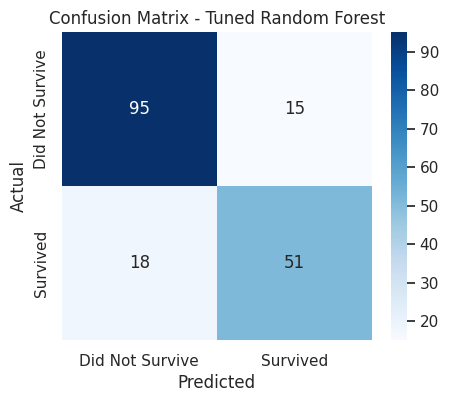

In [54]:
# 9) Visualize the confusion matrix for the tuned model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

Great work - we gave our Random Forest a “settings makeover” - but here’s what really happened.

---

### Before Tuning

Before tuning, our Random Forest was running on default settings.  
That’s like driving a sports car but never touching the gears — it works, but it’s not using its full potential.

### After Tuning:
- **Best parameters**: GridSearchCV found the combination of settings that gave the best F1 score on the training folds.
- **Performance change**: Compare the tuned model’s accuracy, precision, recall, and F1 score to the untuned version.  
  Even a small increase here is valuable — in the real world, a 2–3% boost could mean thousands more correct predictions.

---

### So, what's the impact
- **Higher F1 score** → We’re balancing precision and recall better.
- **Recall change** → We might be catching more survivors.
- **Precision change** → We might be making fewer “false alarms”.

In short: tuning helps the model focus on the most useful patterns while ignoring noise.

---

### A key takeaway
In real projects, hyperparameter tuning can be the difference between a model that’s “good enough” and one that actually drives business results.

> It’s not always about huge gains — even small improvements can be significant when scaled to thousands (or even millions!) of predictions.

## **8. Experimentation: A Boosting Algorithm**

Now that we’ve learnt what Random Forest can do, let’s try a different approach: **boosting**.

---

### What is boosting?
Boosting is a way of building models where:
1. The first model makes predictions.
2. The next model focuses on fixing the mistakes of the first one.
3. This repeats over and over — each new model learning from the errors of the previous.

By the end, you have a strong model made up of many “weak” ones.

---

### Why XGBoost?
- **XGBoost** (Extreme Gradient Boosting) is one of the most popular boosting algorithms.
- It often wins machine learning competitions because it’s:
  - Fast
  - Handles missing data
  - Works well with default settings
  - Highly tunable for extra performance
- It’s great at capturing complex patterns in the data.

---

### Lets consider this example
Imagine a group project where:
- The first person writes a draft.
- The second person fixes the typos and grammar mistakes.
- The third person improves the flow and structure.
- The fourth adds extra facts and examples.

Each person builds on the work of the one before, so the final product is much better than the first draft. That's basically what this approach does.

---

### Here's the plan:
1. Train an XGBoost model with reasonable settings (we’ll tune later if needed).
2. Predict on the test set.
3. Compare metrics (accuracy, precision, recall, F1) to Random Forest.
4. Look at feature importance to see what XGBoost thinks matters most.

This will give us another benchmark and help us decide if boosting outperforms bagging (Random Forest) for Titanic survival.

In [55]:
# 1) Initialize the XGBoost model
xgb_clf = XGBClassifier(
    n_estimators=200,       # number of boosting rounds
    learning_rate=0.05,     # smaller learning rate = more careful learning
    max_depth=4,            # depth of each tree
    subsample=0.8,          # fraction of data to use for each tree
    colsample_bytree=0.8,   # fraction of features for each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   # prevents warning about default metric
)

In [56]:
# 2) Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
# 3) Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

In [58]:
# 4) Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"Accuracy : {acc_xgb:.3f}")
print(f"Precision: {prec_xgb:.3f}")
print(f"Recall   : {rec_xgb:.3f}")
print(f"F1 Score : {f1_xgb:.3f}")

XGBoost Performance:
Accuracy : 0.799
Precision: 0.770
Recall   : 0.681
F1 Score : 0.723


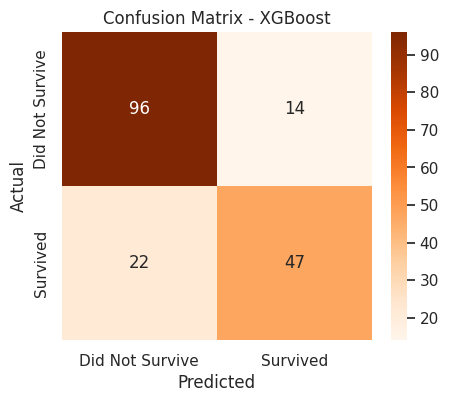

In [59]:
# 5) Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

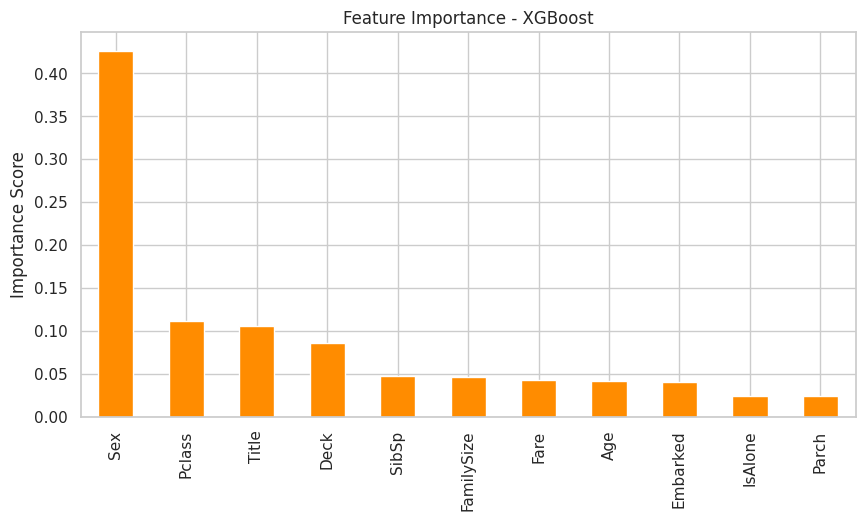

In [60]:
# 6) Feature importance
feat_importances_xgb = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
feat_importances_xgb.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='darkorange')
plt.title('Feature Importance - XGBoost')
plt.ylabel('Importance Score')
plt.show()

## **9. Stacking Models for Maximum Performance**

We’ve tried three different approaches:
- Logistic Regression → Simple, interpretable, but limited in capturing complex patterns.
- Random Forest → Strong, handles non-linear relationships, and robust to noise.
- XGBoost → Powerful boosting method that learns from mistakes and fine-tunes decision boundaries.

Each model has its own **strengths** and **weaknesses**.  

So… what if we didn’t choose just one?  
What if we combined them so they could work together?

---

### What is stacking?
Stacking is a way of combining multiple models into a single **ensemble**:
1. Several “base models” each make predictions.
2. A “meta-model” learns from those predictions to make a final decision.

Think of it like:
- You ask three doctors for a diagnosis.
- Each gives their opinion.
- Then a senior doctor reviews all three opinions and makes the final call.

---

### 🧠 Why stacking works
Different models may make **different mistakes**:
- Logistic Regression might struggle with non-linear patterns.
- Random Forest might miss some subtle interactions.
- XGBoost might overfit in certain edge cases.

By blending them:
- Where one model is weak, another might be strong.
- The meta-model can learn which model to trust more in different situations.

---

### So, here's the plan:
1. Use Logistic Regression, Random Forest, and XGBoost as **base models**.
2. Use a simple Logistic Regression as the **meta-model** to combine their predictions.
3. Train on the training set and evaluate on the test set.
4. Compare the stacked model’s performance to our individual models.

> If done right, stacking can get out those last few percentage points of performance that no single model could get alone.

In [61]:
# 1) Define the base models
base_models = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
]

In [62]:
# 2) Define the meta-model (final estimator)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

In [66]:
# 3) Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

In [67]:
# 4) Train the stacked model
stack_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical...
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

In [68]:
# 5) Predict on the test set
y_pred_stack = stack_clf.predict(X_test)

In [69]:
# 6) Evaluate the stacked model
acc_stack = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack)
rec_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

print("Stacked Model Performance:")
print(f"Accuracy : {acc_stack:.3f}")
print(f"Precision: {prec_stack:.3f}")
print(f"Recall   : {rec_stack:.3f}")
print(f"F1 Score : {f1_stack:.3f}")

Stacked Model Performance:
Accuracy : 0.816
Precision: 0.800
Recall   : 0.696
F1 Score : 0.744


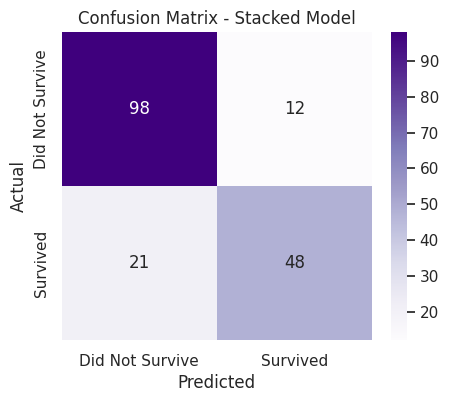

In [70]:
# 7) Confusion matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,4))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Stacked Model')
plt.show()

We just trained our first **stacked model** - a team of models working together

So how did it do?

- If the stacked model’s F1 score is higher than all the others, that’s a big win — it means combining models really paid off.
- If it’s about the same as the best single model, that’s still fine — sometimes the benefit of stacking is small if one model already dominates.
- If it’s worse (rare), it means our base models might be too similar, so the meta-model doesn’t learn much new.

---

### Why stacking can improve results
Different models “think” differently:
- Logistic Regression: linear, interpretable, but limited in complexity.
- Random Forest: great at non-linear patterns and interactions.
- XGBoost: very good at fine-tuning mistakes and finding subtle patterns.

By stacking:
- The meta-model learns **when to trust each base model**.
- This can improve recall, precision, or both — especially in tricky cases.

---

### Key takeaway

> Even if our improvement here is small, we’ve now set up a framework we can use for **bigger, more complex datasets**, where stacking often shines.

## **10. Feature Selection and Cross-Validation**

Now that we’ve tested different models, it’s time to explore **Feature Selection**.

In real-world projects:
- You often have **many features** — not all of them are useful.
- Some might add noise or cause overfitting.
- You want a reproducible process that combines preprocessing, feature selection, and modeling in **one pipeline**.

---

### Why feature selection matters
- **Reduces noise** → Irrelevant features can confuse the model.
- **Improves speed** → Less data to process means faster training.
- **Helps generalization** → Fewer features can mean less overfitting.

We’ll use **SelectFromModel** with a Random Forest to automatically pick the most important features, then pass only those to our final model.

---

### Why use pipelines?
- Keeps all steps together so we don’t accidentally “leak” information from the test set.
- Makes the workflow cleaner and more reproducible.
- Works perfectly with cross-validation for reliable scoring.

---

### Here's the plan
1. Create a pipeline:
   - Feature selection step using a tree-based model.
   - Final estimator (we’ll try XGBoost for maximum power).
2. Use cross-validation to get a reliable estimate of performance.
3. Train on the full training set and evaluate on the test set.
4. Compare with our previous best model.

In [71]:
# 1) Feature selection step (using Random Forest importance)
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42))

In [72]:
# 2) Final model (XGBoost)
final_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [73]:
# 3) Create pipeline
pipeline = Pipeline([
    ('feature_selection', feature_selector),
    ('classifier', final_xgb)
])

In [74]:
# 4) Cross-validation scoring on the training set
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.3f}")

Cross-Validation F1 Scores: [0.73214286 0.64646465 0.76106195 0.78095238 0.80373832]
Mean CV F1 Score: 0.745


In [75]:
# 5) Train pipeline on the full training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=200,
                                                                  random_state=42))),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feat...s=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [76]:
# 6) Evaluate on the test set
y_pred_pipeline = pipeline.predict(X_test)
acc_pipe = accuracy_score(y_test, y_pred_pipeline)
prec_pipe = precision_score(y_test, y_pred_pipeline)
rec_pipe = recall_score(y_test, y_pred_pipeline)
f1_pipe = f1_score(y_test, y_pred_pipeline)

print("\nPipeline Model Performance:")
print(f"Accuracy : {acc_pipe:.3f}")
print(f"Precision: {prec_pipe:.3f}")
print(f"Recall   : {rec_pipe:.3f}")
print(f"F1 Score : {f1_pipe:.3f}")


Pipeline Model Performance:
Accuracy : 0.788
Precision: 0.738
Recall   : 0.696
F1 Score : 0.716


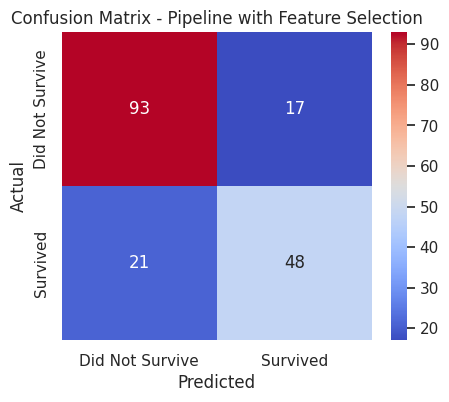

In [77]:
# 7) Confusion matrix
cm_pipe = confusion_matrix(y_test, y_pred_pipeline)
plt.figure(figsize=(5,4))
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Pipeline with Feature Selection')
plt.show()

## **11. Automated Hyperparameter Optimization (Optuna)**

We’ve hand-tuned models and even stacked them — now let’s let the computer **search the parameters for us**.

### Why automate tuning?
Hyperparameters (like `max_depth`, `n_estimators`, `learning_rate`) control *how* a model learns.  
Guessing them by hand is slow and hit-or-miss. **Optuna** runs many small experiments, learns which regions look promising, and explores them more (Bayesian-ish, with pruning for bad runs).

### What we’ll do
1. Use **Optuna** to optimize models **with cross-validation** (so results are stable).
2. Optimize **XGBoost** and **Random Forest** separately (two studies).
3. Pick the best settings, **retrain on the full train set**, and evaluate on the **test set**.
4. Visualize optimization history to see if the search converged.

> Tip: In real projects, you can point Optuna at *pipelines* (with feature engineering steps inside) and even multiple model families at once.

[I 2025-08-09 22:05:02,774] A new study created in memory with name: xgb_titanic
[I 2025-08-09 22:05:02,993] Trial 0 finished with value: 0.7197436305455543 and parameters: {'n_estimators': 161, 'learning_rate': 0.04183786107771554, 'max_depth': 2, 'subsample': 0.7415499605489212, 'colsample_bytree': 0.8945531516549409, 'min_child_weight': 4, 'gamma': 1.4088014944102238, 'reg_lambda': 3.36156710667852, 'reg_alpha': 9.559396882991596}. Best is trial 0 with value: 0.7197436305455543.
[I 2025-08-09 22:05:03,540] Trial 1 finished with value: 0.7471809524389375 and parameters: {'n_estimators': 408, 'learning_rate': 0.0141887417732239, 'max_depth': 5, 'subsample': 0.617845542424676, 'colsample_bytree': 0.8558173522137804, 'min_child_weight': 5, 'gamma': 0.46542528467748756, 'reg_lambda': 0.2481362594384953, 'reg_alpha': 0.6657951291887938}. Best is trial 1 with value: 0.7471809524389375.
[I 2025-08-09 22:05:03,832] Trial 2 finished with value: 0.7458358107638908 and parameters: {'n_estimator

XGB Best Params: {'n_estimators': 522, 'learning_rate': 0.13999514969650215, 'max_depth': 6, 'subsample': 0.6714909153432992, 'colsample_bytree': 0.7361877604568194, 'min_child_weight': 8, 'gamma': 0.871103178207646, 'reg_lambda': 1.154053050513257, 'reg_alpha': 0.005208345255226351}
XGB Best CV F1 : 0.7762076477180587

XGB (Optuna) Test Performance:
Accuracy : 0.832
Precision: 0.820
Recall   : 0.725
F1 Score : 0.769


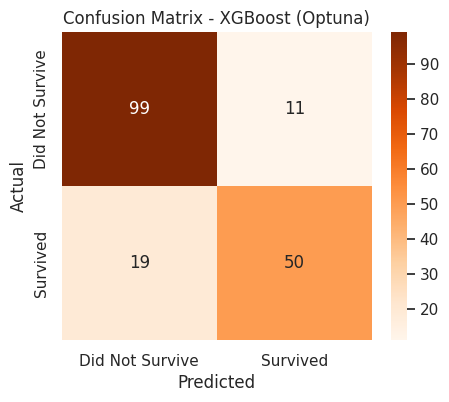

In [80]:
RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Helper to evaluate a model with CV and return mean F1
def cv_f1(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)
    return scores.mean()

# 1) Study A: Optimize XGBoost
def objective_xgb(trial):
    params = dict(
        n_estimators=trial.suggest_int('n_estimators', 100, 600),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        max_depth=trial.suggest_int('max_depth', 2, 8),
        subsample=trial.suggest_float('subsample', 0.6, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
        min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
        gamma=trial.suggest_float('gamma', 0.0, 5.0),
        reg_lambda=trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        reg_alpha=trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        random_state=RANDOM_STATE,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model = XGBClassifier(**params)
    return cv_f1(model, X_train, y_train, cv)

study_xgb = optuna.create_study(direction='maximize', study_name='xgb_titanic')
study_xgb.optimize(objective_xgb, n_trials=30, show_progress_bar=False)

print("XGB Best Params:", study_xgb.best_params)
print("XGB Best CV F1 :", study_xgb.best_value)

# Train best XGB on full train and evaluate on test
best_xgb = XGBClassifier(**study_xgb.best_params)
best_xgb.fit(X_train, y_train)
y_pred_xgb_opt = best_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred_xgb_opt)
prec = precision_score(y_test, y_pred_xgb_opt)
rec = recall_score(y_test, y_pred_xgb_opt)
f1 = f1_score(y_test, y_pred_xgb_opt)

print("\nXGB (Optuna) Test Performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")

cm = confusion_matrix(y_test, y_pred_xgb_opt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.title('Confusion Matrix - XGBoost (Optuna)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[I 2025-08-09 22:05:16,397] A new study created in memory with name: rf_titanic
[I 2025-08-09 22:05:22,061] Trial 0 finished with value: 0.7453924321965559 and parameters: {'n_estimators': 574, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7453924321965559.
[I 2025-08-09 22:05:27,746] Trial 1 finished with value: 0.740543061884948 and parameters: {'n_estimators': 574, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.7453924321965559.
[I 2025-08-09 22:05:31,584] Trial 2 finished with value: 0.7377739796171734 and parameters: {'n_estimators': 425, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7453924321965559.
[I 2025-08-09 22:05:33,038] Trial 3 finished with value: 0.7454042489360141 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 12, 'min_sampl


RF Best Params: {'n_estimators': 182, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': None}
RF Best CV F1 : 0.7698100908991998

RF (Optuna) Test Performance:
Accuracy : 0.765
Precision: 0.737
Recall   : 0.609
F1 Score : 0.667


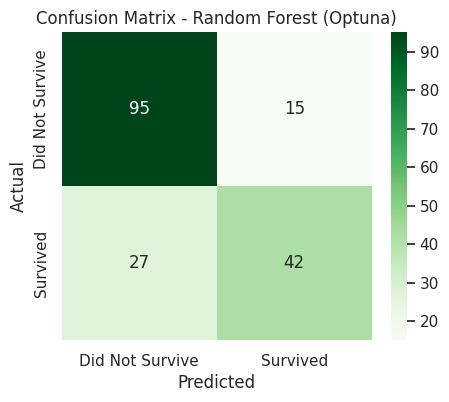

In [81]:
# 2) Study B: Optimize Random Forest
def objective_rf(trial):
    params = dict(
        n_estimators=trial.suggest_int('n_estimators', 100, 600),
        max_depth=trial.suggest_int('max_depth', 2, 30),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    model = RandomForestClassifier(**params)
    return cv_f1(model, X_train, y_train, cv)

study_rf = optuna.create_study(direction='maximize', study_name='rf_titanic')
study_rf.optimize(objective_rf, n_trials=30, show_progress_bar=False)

print("\nRF Best Params:", study_rf.best_params)
print("RF Best CV F1 :", study_rf.best_value)

# Train best RF on full train and evaluate on test
best_rf = RandomForestClassifier(**study_rf.best_params)
best_rf.fit(X_train, y_train)
y_pred_rf_opt = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf_opt)
prec = precision_score(y_test, y_pred_rf_opt)
rec = recall_score(y_test, y_pred_rf_opt)
f1 = f1_score(y_test, y_pred_rf_opt)

print("\nRF (Optuna) Test Performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")

cm = confusion_matrix(y_test, y_pred_rf_opt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.title('Confusion Matrix - Random Forest (Optuna)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

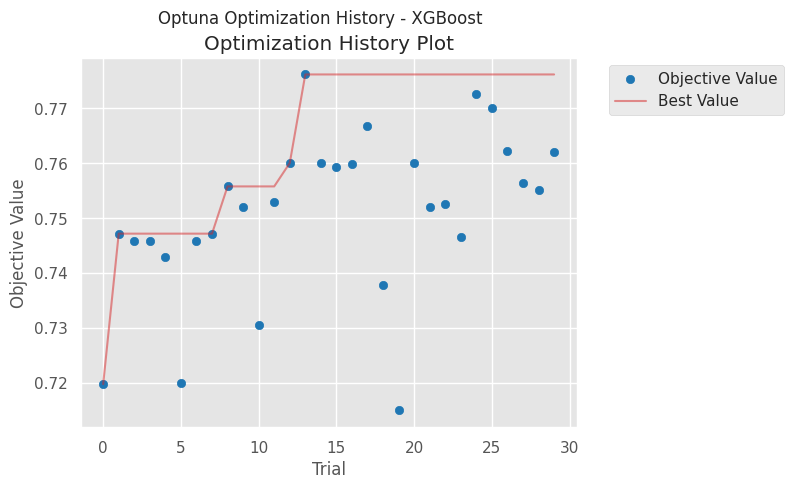

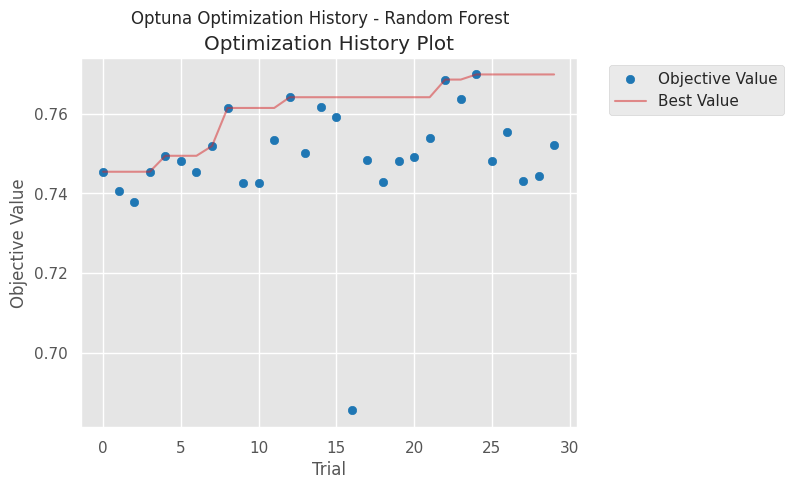

In [82]:
# 3) Visualize optimization history
try:
    from optuna.visualization.matplotlib import plot_optimization_history
    ax = plot_optimization_history(study_xgb)
    plt.suptitle("Optuna Optimization History - XGBoost")
    plt.show()

    ax = plot_optimization_history(study_rf)
    plt.suptitle("Optuna Optimization History - Random Forest")
    plt.show()
except Exception as e:
    print("Optuna visualization not available:", e)

## **12. Building Our Own AutoML Leaderboard**

Okay — Up until now, we’ve been experimenting with one model at a time, kind of like taste-testing a single recipe before a dinner party. But if we really want to *impress the guests* (aka your stakeholders, boss, or even just your own curiosity), we should try a few different dishes and see which one’s the winner.

In data science terms, this means:  
- Pick a few strong model candidates.  
- Test them under **exactly the same conditions** so the results are fair.  
- Compare their performance and crown a champion.

This is basically our **DIY AutoML**. We’re not going to use a huge automated library like `Auto-sklearn` or `TPOT` just yet — we’ll keep it small, simple, and 100% under our control.  

Here’s how it works:  
1. We **set up our competitors** and any tuned versions we might have from earlier.
2. We run them through the **same cross-validation process** (Stratified K-Fold CV so our class imbalance doesn’t throw things off).
3. We **measure performance** with F1 score (because survival prediction here is a classification task and F1 balances precision and recall nicely).
4. We create a **leaderboard** sorted by performance so we can instantly see who’s top dog.

###Why is this step important?  
Because in the real world, we don’t get bonus points for “loyalty” to a single algorithm.

You might *love* Random Forest because it’s easy to use, but if XGBoost wipes the floor with it in terms of performance… you go with XGBoost.

Stakeholders only care about results, not your emotional attachment to an algorithm.

> By the end of this step, we’ll have a **clear winner** and know exactly which model to take forward into the next steps (like probability calibration and explainability).

In [83]:
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None
try:
    from lightgbm import LGBMClassifier
except Exception:
    LGBMClassifier = None
try:
    from catboost import CatBoostClassifier
except Exception:
    CatBoostClassifier = None

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 1) Define candidates
raw_candidates = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "Ridge Classifier": RidgeClassifier(random_state=RANDOM_STATE),
    "SGD Classifier": SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_STATE),
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3, random_state=RANDOM_STATE),

    # Tree-based
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=RANDOM_STATE),

    # Ensembles
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=RANDOM_STATE),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=RANDOM_STATE),

    # Distance
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),

    # Naive Bayes
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),

    # SVMs
    "Linear SVM": LinearSVC(max_iter=5000, random_state=RANDOM_STATE),
    "Kernel SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE),

    # Boosting libraries
    "XGBoost": None if XGBClassifier is None else XGBClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.8,
        random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss'
    ),
    "LightGBM": None if LGBMClassifier is None else LGBMClassifier(
        n_estimators=200, learning_rate=0.05, max_depth=-1, subsample=0.8, colsample_bytree=0.8,
        random_state=RANDOM_STATE
    ),
    "CatBoost": None if CatBoostClassifier is None else CatBoostClassifier(
        iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=RANDOM_STATE
    ),
}

# Filter to installed/available models only
candidates = {k: v for k, v in raw_candidates.items() if v is not None}
print(f"Using {len(candidates)} installed models:")
print("   " + ", ".join(candidates.keys()))

Using 18 installed models:
   Logistic Regression, Ridge Classifier, SGD Classifier, Perceptron, Decision Tree, Extra Trees, Random Forest, Gradient Boosting, AdaBoost, HistGradientBoosting, K-Nearest Neighbors, GaussianNB, BernoulliNB, Linear SVM, Kernel SVM (RBF), XGBoost, LightGBM, CatBoost


In [84]:
# 2) Which models need scaling?
NEED_SCALING = {
    "Logistic Regression", "Ridge Classifier", "SGD Classifier", "Perceptron",
    "K-Nearest Neighbors", "Linear SVM", "Kernel SVM (RBF)"
}
# (Trees, Naive Bayes, and histogram-based/boosting trees don't need scaling)

In [85]:
# 3) Parameter spaces for a *quick* RandomizedSearch on the top-3 models
param_spaces = {
    "Logistic Regression": {
        "clf__C": np.logspace(-2, 2, 20),
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__class_weight": [None, "balanced"],
    },
    "Ridge Classifier": {
        "clf__alpha": np.logspace(-3, 2, 20),
        "clf__class_weight": [None, "balanced"],
    },
    "SGD Classifier": {
        "clf__alpha": np.logspace(-5, -2, 15),
        "clf__loss": ["hinge", "log_loss"],
        "clf__penalty": ["l2", "l1", "elasticnet"],
    },
    "Perceptron": {
        "clf__alpha": np.logspace(-5, -2, 15),
        "clf__penalty": ["l2", "l1", "elasticnet", None],
    },
    "K-Nearest Neighbors": {
        "clf__n_neighbors": [3, 5, 7, 9, 11],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2],  # Manhattan vs Euclidean
    },
    "Linear SVM": {
        "clf__C": np.logspace(-2, 2, 20),
        "clf__class_weight": [None, "balanced"],
    },
    "Kernel SVM (RBF)": {
        "clf__C": np.logspace(-2, 2, 20),
        "clf__gamma": np.logspace(-4, 0, 20),
        "clf__class_weight": [None, "balanced"],
    },
    "Decision Tree": {
        "clf__max_depth": [None, 4, 6, 8, 12],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
        "clf__criterion": ["gini", "entropy"],
    },
    "Extra Trees": {
        "clf__n_estimators": [200, 300, 500],
        "clf__max_depth": [None, 6, 10, 14],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
        "clf__max_features": ["sqrt", "log2"],
    },
    "Random Forest": {
        "clf__n_estimators": [200, 300, 500],
        "clf__max_depth": [None, 6, 10, 14],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
        "clf__max_features": ["sqrt", "log2"],
    },
    "Gradient Boosting": {
        "clf__n_estimators": [200, 300],
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__max_depth": [2, 3, 4],
        "clf__subsample": [0.8, 1.0],
    },
    "AdaBoost": {
        "clf__n_estimators": [200, 400],
        "clf__learning_rate": [0.03, 0.05, 0.1, 0.2],
    },
    "HistGradientBoosting": {
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__max_depth": [None, 4, 6, 8],
        "clf__max_leaf_nodes": [None, 15, 31, 63],
    },
    "GaussianNB": {},
    "BernoulliNB": {
        "clf__alpha": np.logspace(-3, 1, 12),
    },
}
# Add spaces for optional libs only if present
if "XGBoost" in candidates:
    param_spaces["XGBoost"] = {
        "clf__n_estimators": [200, 300, 500],
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__max_depth": [3, 4, 5, 6],
        "clf__subsample": [0.8, 0.9, 1.0],
        "clf__colsample_bytree": [0.8, 0.9, 1.0],
        "clf__min_child_weight": [1, 3, 5],
        "clf__reg_lambda": [1, 3, 5, 10],
        "clf__reg_alpha": [0, 0.01, 0.1],
    }
if "LightGBM" in candidates:
    param_spaces["LightGBM"] = {
        "clf__n_estimators": [200, 300, 500],
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__num_leaves": [15, 31, 63],
        "clf__subsample": [0.8, 0.9, 1.0],
        "clf__colsample_bytree": [0.8, 0.9, 1.0],
        "clf__reg_lambda": [0, 1, 3, 5, 10],
        "clf__reg_alpha": [0, 0.01, 0.1],
    }
if "CatBoost" in candidates:
    param_spaces["CatBoost"] = {
        "clf__iterations": [200, 400],
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__depth": [4, 6, 8],
        "clf__l2_leaf_reg": [1, 3, 5, 7],
    }

In [86]:
# 4) Cross-validate all models fairly
scoring = {"f1": "f1", "accuracy": "accuracy", "precision": "precision", "recall": "recall"}
results = []

for name, estimator in candidates.items():
    steps = []
    if name in NEED_SCALING:
        steps.append(("scaler", StandardScaler()))
    steps.append(("clf", estimator))
    pipe = Pipeline(steps)

    cv_out = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    results.append({
        "model": name,
        "f1_mean": np.mean(cv_out["test_f1"]),
        "f1_std":  np.std(cv_out["test_f1"]),
        "acc_mean": np.mean(cv_out["test_accuracy"]),
        "prec_mean": np.mean(cv_out["test_precision"]),
        "rec_mean": np.mean(cv_out["test_recall"]),
        "fit_time": np.mean(cv_out["fit_time"]),
    })

lb = pd.DataFrame(results).sort_values("f1_mean", ascending=False).reset_index(drop=True)
print("\n Leaderboard — CV (5-fold)")
print(lb[["model","f1_mean","f1_std","acc_mean","prec_mean","rec_mean","fit_time"]]
      .to_string(index=False, float_format=lambda x: f"{x:.3f}"))


 Leaderboard — CV (5-fold)
               model  f1_mean  f1_std  acc_mean  prec_mean  rec_mean  fit_time
            CatBoost    0.768   0.026     0.830      0.817     0.729     0.485
             XGBoost    0.766   0.025     0.830      0.814     0.725     0.096
            AdaBoost    0.763   0.032     0.819      0.769     0.758     0.600
   Gradient Boosting    0.758   0.028     0.824      0.810     0.718     0.248
    Kernel SVM (RBF)    0.756   0.016     0.822      0.798     0.722     0.092
       Random Forest    0.754   0.026     0.816      0.774     0.736     0.592
HistGradientBoosting    0.751   0.046     0.817      0.792     0.714     0.210
            LightGBM    0.748   0.035     0.813      0.778     0.722     0.226
          GaussianNB    0.747   0.031     0.789      0.697     0.809     0.007
         Extra Trees    0.740   0.022     0.802      0.745     0.736     0.459
 K-Nearest Neighbors    0.738   0.018     0.808      0.775     0.711     0.009
 Logistic Regression    

In [87]:
# 5) Quick-tune the top-3 models (small randomized search)
TOP_N = min(3, len(lb))
N_ITER = 12  # keep small for notebook speed

tuned = []
for i in range(TOP_N):
    name = lb.loc[i, "model"]
    estimator = candidates[name]

    steps = []
    if name in NEED_SCALING:
        steps.append(("scaler", StandardScaler()))
    steps.append(("clf", estimator))
    pipe = Pipeline(steps)

    space = param_spaces.get(name, {})
    if not space:  # nothing to tune; just carry over baseline CV mean
        tuned.append({"model": f"{name} (untuned)", "best_estimator": pipe, "cv_f1": lb.loc[i,"f1_mean"]})
        continue

    tuner = RandomizedSearchCV(
        pipe, param_distributions=space, n_iter=N_ITER, scoring="f1",
        cv=cv, n_jobs=-1, random_state=RANDOM_STATE, verbose=0
    )
    tuner.fit(X_train, y_train)
    tuned.append({"model": f"{name} (tuned)", "best_estimator": tuner.best_estimator_, "cv_f1": tuner.best_score_})

tuned_df = pd.DataFrame(tuned).sort_values("cv_f1", ascending=False).reset_index(drop=True)
print("\n Tuned Top Models — CV F1")
print(tuned_df.to_string(index=False, float_format=lambda x: f"{x:.3f}"))


 Tuned Top Models — CV F1
           model                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             


 Selected Best Model: CatBoost (tuned)

 Test Performance (Winner)
 Accuracy : 0.821
 Precision: 0.794
 Recall   : 0.725
 F1 Score : 0.758


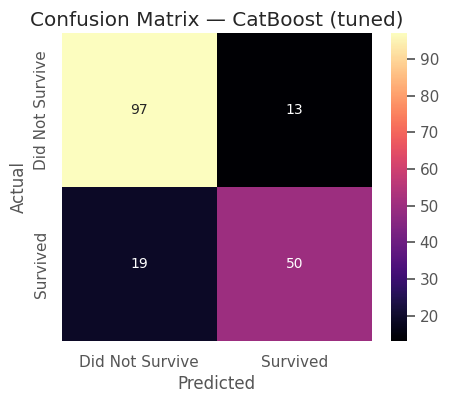

In [88]:
# 6) Pick winner and evaluate on test
winner_name = tuned_df.loc[0, "model"]
winner = tuned_df.loc[0, "best_estimator"]
print(f"\n Selected Best Model: {winner_name}")

winner.fit(X_train, y_train)
y_pred = winner.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n Test Performance (Winner)")
print(f" Accuracy : {acc:.3f}")
print(f" Precision: {prec:.3f}")
print(f" Recall   : {rec:.3f}")
print(f" F1 Score : {f1:.3f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=['Did Not Survive','Survived'],
            yticklabels=['Did Not Survive','Survived'])
plt.title(f'Confusion Matrix — {winner_name}')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()

# **Well… you’ve made it!**

From raw CSV data to a finely tuned **multi-model leaderboard**, you’ve taken the Titanic dataset through the **full data science lifecycle** — step-by-step, without skipping the fun parts.

The coolest part?  
You didn’t just stop at “train a model, get accuracy.”  

Instead, you explored a variety of **ML families** — linear models, decision trees, ensemble methods, distance-based algorithms, SVMs, and even modern gradient boosting powerhouses like XGBoost, LightGBM, and CatBoost.

This mirrors real-world data science work:
- We rarely know which model will perform best upfront.
- We test, compare, and interpret before making a decision.
- The goal isn’t just accuracy — it’s building something that’s **robust, explainable, and production-ready**.

---

## Final Thought
Data science isn’t just crunching numbers.  

It’s about **curiosity** — asking the right questions, exploring the data, and letting evidence guide your next move.  

We took the Titanic as our case study, but these steps apply to *any* machine learning project you’ll ever tackle.

So, next time you’re handed a dataset, you’ll know what to do:
- Explore it.
- Clean it.
- Try different approaches.
- Let the results speak.

And who knows… maybe your next model will be the one that tops the leaderboard.✨


## 📌 Connect with Me

If you enjoyed this tutorial, learned something new, or have any questions, I’d love to connect with you!

**Follow me on:**
- **LinkedIn:** [Sahir Maharaj](https://www.linkedin.com/in/sahir-maharaj/)
- **Kaggle:** [Sahir Maharaj](https://www.kaggle.com/sahirmaharajj)
- **Microsoft Super User Profile:** [Fabric Community](https://community.fabric.microsoft.com/t5/user/viewprofilepage/user-id/501067)
- **Topmate (Free Power BI Sessions):** [Let's Chat](https://topmate.io/sahirmaharaj)

💬 Whether it’s AI, data science, Power BI, or just a coffee chat, I’m always up for a conversation.